    Homework 03: K Nearest Neighbour (KNN)
    AMRUTHA KANAKATTE RAVISHANKAR
    CWID :20027346
This task is to perform a K-Nearest Neighbors (KNN) algorithm, which is a simple supervised machine learning method employed to tackle classification problems

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Importing the dataset
df = pd.read_csv('breast-cancer-wisconsin.csv')
print(df.describe())
df.head(10)

             Sample          F1          F2          F3          F4  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               F5          F7          F8          F9       Class  
count  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.437768    2.866953    1.589413    2.689557  
std      2.214300    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000   

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
# Data Preprocessing: Handling missing values by dropping the row with missing columns
print(f"The shape of the dataset before pre-processing:{df.shape}")
print("Rows with missing values:")
print(df[df.isin(['?']).any(axis=1)]) 
df.replace('?', pd.NA, inplace=True) #replacing '?' with NaN
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()  #Dropping the rows with missing values
print(df[df.isna().any(axis=1)])  
print(f"The shape of the dataset after dropping missing values:{df.shape}")

The shape of the dataset before pre-processing:(699, 11)
Rows with missing values:
      Sample  F1  F2  F3  F4  F5 F6  F7  F8  F9  Class
23   1057013   8   4   5   1   2  ?   7   3   1      4
40   1096800   6   6   6   9   6  ?   7   8   1      2
139  1183246   1   1   1   1   1  ?   2   1   1      2
145  1184840   1   1   3   1   2  ?   2   1   1      2
158  1193683   1   1   2   1   3  ?   1   1   1      2
164  1197510   5   1   1   1   2  ?   3   1   1      2
235  1241232   3   1   4   1   2  ?   3   1   1      2
249   169356   3   1   1   1   2  ?   3   1   1      2
275   432809   3   1   3   1   2  ?   2   1   1      2
292   563649   8   8   8   1   2  ?   6  10   1      4
294   606140   1   1   1   1   2  ?   2   1   1      2
297    61634   5   4   3   1   2  ?   2   3   1      2
315   704168   4   6   5   6   7  ?   4   9   1      2
321   733639   3   1   1   1   2  ?   3   1   1      2
411  1238464   1   1   1   1   1  ?   2   1   1      2
617  1057067   1   1   1   1   1  ?  

In [4]:
#Labelling the features (X) and labels (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable
print(f'Features: {X.head()}')
print(f'Targets: {y.head()}')

Features:     Sample  F1  F2  F3  F4  F5    F6  F7  F8  F9
0  1000025   5   1   1   1   2   1.0   3   1   1
1  1002945   5   4   4   5   7  10.0   3   2   1
2  1015425   3   1   1   1   2   2.0   3   1   1
3  1016277   6   8   8   1   3   4.0   3   7   1
4  1017023   4   1   1   3   2   1.0   3   1   1
Targets: 0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64


In [5]:
#Scaling the features
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,0.069946,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.070164,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.071096,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.071160,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.071216,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


In [6]:
#Data Splitting as train and test set(0.7 and 0.3 respectively)
X_train, X_test, y_train, y_test  = train_test_split(X, y,test_size = 0.3, random_state = 3, shuffle = True)
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of y_train: (478,)
Shape of X_train: (478, 10)
Shape of X_test: (205, 10)
Shape of y_test: (205,)


In [7]:
# Training K Neighbors Classifer on Train data
k_values = [3, 5, 10]
predictions = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    predictions[k] = y_pred
    

In [8]:
#Evaluation of KNN for all the values of k
for k in k_values:
    y_pred = predictions[k]
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f'Accuracy of model with k = {k}: {accuracy:.2f}%\n')
    
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix')
    print(cm)
    print()
    
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    print('-' * 40)


Accuracy of model with k = 3: 96.10%

Confusion Matrix
[[124   4]
 [  4  73]]

Classification Report
              precision    recall  f1-score   support

           2       0.97      0.97      0.97       128
           4       0.95      0.95      0.95        77

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

----------------------------------------
Accuracy of model with k = 5: 96.59%

Confusion Matrix
[[124   4]
 [  3  74]]

Classification Report
              precision    recall  f1-score   support

           2       0.98      0.97      0.97       128
           4       0.95      0.96      0.95        77

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205

----------------------------------------
Accuracy of model with k = 10: 95.61%

Confusion Matrix
[[124 

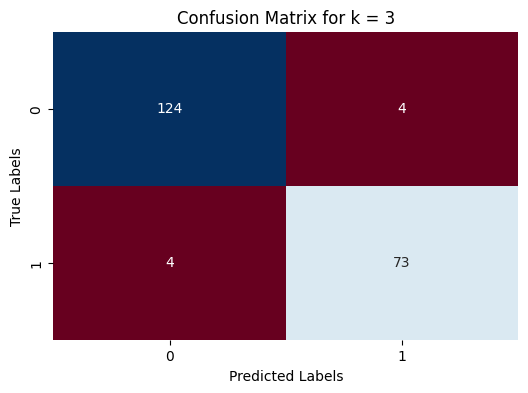

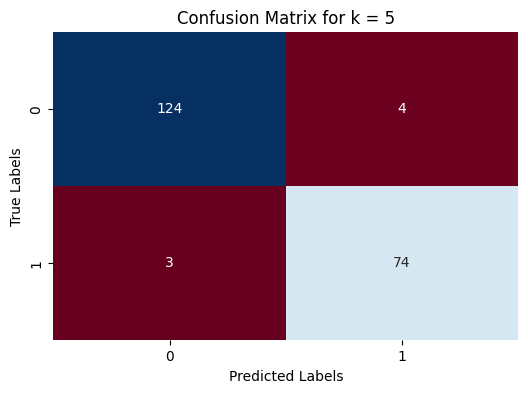

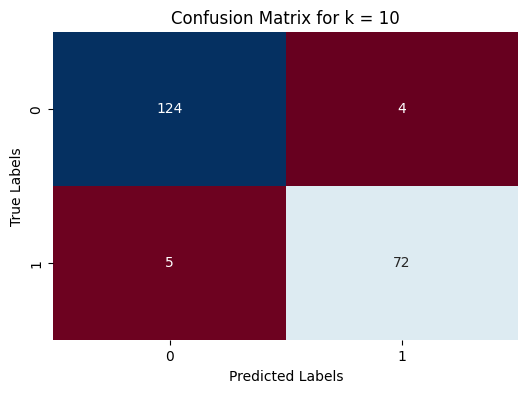

In [9]:
#Plotting the confusion matrix for all values of k
for k in k_values:
    y_pred = predictions[k]  
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdBu', cbar=False)
    plt.title(f'Confusion Matrix for k = {k}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()